# Homework 0

**Name:** Oscar Eduardo Arámbula Vega

**e-mail:** oscar.arambula4388@alumnos.udg.mx

# MODULES

In [22]:
# Load modules
from typing import Callable
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

The eason function is: $f(x,y) = -cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2}$

The gradient of the Eason function is: $\nabla f(x,y) = \begin{bmatrix} sin(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(x - \pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} \\ cos(x)sin(y)e^{-(x-\pi)^2-(y-\pi)^2} + 2(y -\pi)cos(x)cos(y)e^{-(x-\pi)^2-(y-\pi)^2} \end{bmatrix}$

I extracted the gradient from the following [source](https://www.mdrk.io/interesting-functions-to-optimize/).

This could be simplified to: $\nabla f(x,y) = \begin{bmatrix} cos(y)e^{-(x-\pi)^2-(y-\pi)^2}(sin(x)+ 2(x - \pi)cos(x)) \\ cos(x)e^{-(x-\pi)^2-(y-\pi)^2}(sin(y)+ 2(x - \pi)cos(y)) \end{bmatrix}$



In [23]:
# Function to be optimized
def easom[T: npt.NDArray[float|int]](x: T, y: T) -> T:
    return -np.cos(x) * np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2)

def easom_gradient(x: float, y: float) -> npt.NDArray[float]:
    grad_x = np.cos(y) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(x) + 2 * (x - np.pi) * np.cos(x))
    grad_y = np.cos(x) * np.exp(- (x - np.pi) ** 2 - (y - np.pi) ** 2) * (np.sin(y) + 2 * (y - np.pi) * np.cos(y))
    return np.array([grad_x, grad_y])

f = easom
f_gradient = easom_gradient

In [24]:
# Define a meshgrid for plotting the function
x_range = np.arange(-10, 10, 0.05)
y_range = np.arange(-10, 10, 0.05)

X, Y = np.meshgrid(x_range, y_range)
Z = f(X,Y)

In [48]:
# Run gradient descent algorithm
def gradient_descent(
    gradient: Callable[[float, float], npt.NDArray[float]],
    start: npt.NDArray[float],
    learning_rate: float,
    max_iterations: int = 1000,
    tolerance: float = 1e-06,
) -> npt.NDArray[float]:
    current = start
    for i in range(max_iterations):
        diff = - gradient(*current) * learning_rate
        print(i, diff)
        if np.all(np.abs(diff) <= tolerance):
            break
        current += diff
    return current

gradient_descent(f_gradient, np.array([3.10, 3.10]), 0.1)

0 [0.01241559 0.01241559]
1 [0.00873162 0.00873162]
2 [0.00612623 0.00612623]
3 [0.00429322 0.00429322]
4 [0.00300693 0.00300693]
5 [0.00210542 0.00210542]
6 [0.00147399 0.00147399]
7 [0.00103186 0.00103186]
8 [0.00072233 0.00072233]
9 [0.00050564 0.00050564]
10 [0.00035395 0.00035395]
11 [0.00024776 0.00024776]
12 [0.00017344 0.00017344]
13 [0.00012141 0.00012141]
14 [8.49835619e-05 8.49835619e-05]
15 [5.94885063e-05 5.94885063e-05]
16 [4.16419589e-05 4.16419589e-05]
17 [2.91493727e-05 2.91493727e-05]
18 [2.04045614e-05 2.04045614e-05]
19 [1.42831932e-05 1.42831932e-05]
20 [9.99823529e-06 9.99823529e-06]
21 [6.99876472e-06 6.99876472e-06]
22 [4.89913531e-06 4.89913531e-06]
23 [3.42939472e-06 3.42939472e-06]
24 [2.40057631e-06 2.40057631e-06]
25 [1.68040341e-06 1.68040341e-06]
26 [1.17628239e-06 1.17628239e-06]
27 [8.23397673e-07 8.23397673e-07]


array([3.14158991, 3.14158991])

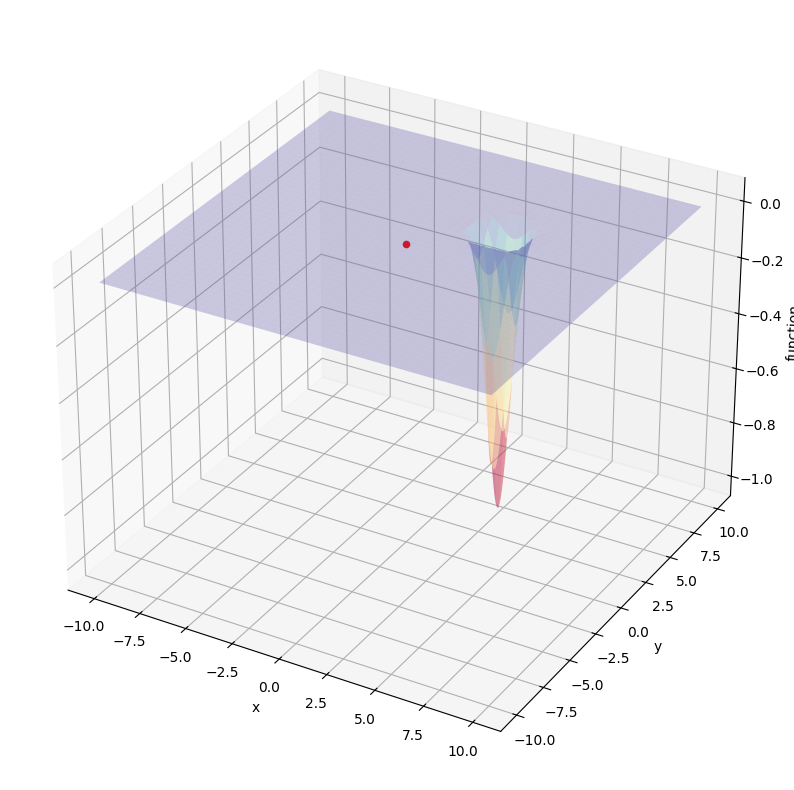

In [49]:
# Plot the results

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='Spectral', alpha=0.3)

ax.scatter(0,0,0, c='r', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('function')
plt.show()